# Simple Neural Network with TensorFlow (Lower Learning Rate)
One hidden layer with 5 units and dropout - with reduced learning rate

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

## Load Datasets


In [47]:
train = pd.read_csv('11-10_train_dataset_W1.csv')
val = pd.read_csv('11-10_val_dataset_W1.csv')

train.set_index('pid', inplace=True)
val.set_index('pid', inplace=True)

X_train_binary = train.drop(['BDI2', 'dep'], axis=1).values
y_train_binary = train['dep'].values
X_val_binary = val.drop(['BDI2', 'dep'], axis=1).values
y_val_binary = val['dep'].values

#the regression data has NaN values that need to be dropped

train_reg = train.dropna(inplace=False)
val_reg = val.dropna(inplace=False)

X_train_reg = train_reg.drop(['BDI2', 'dep'], axis=1).values
y_train_regression = train_reg['BDI2'].values
X_val_reg = val_reg.drop(['BDI2', 'dep'], axis=1).values
y_val_regression = val_reg['BDI2'].values

input_dim_binary = X_train_binary.shape[1]
input_dim_regression = X_train_reg.shape[1] 

#standard rescaling
scaler_binary = StandardScaler()
X_train_binary = scaler_binary.fit_transform(X_train_binary)
X_val_binary = scaler_binary.transform(X_val_binary)

scaler_regression = StandardScaler()
X_train_reg = scaler_regression.fit_transform(X_train_reg)
X_val_reg = scaler_regression.transform(X_val_reg)

## Define Model Architecture
One hidden layer with 5 units and dropout

In [48]:
# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [50]:
input_dim = input_dim_binary  

model_binary = keras.Sequential([

    layers.Input(shape=(input_dim,)),
    
    # Hidden layer with 5 units
    layers.Dense(5, activation='relu', name='hidden_layer'),
    
    # Dropout layer
    layers.Dropout(0.5, name='dropout'),
    
    # Output layer 

    layers.Dense(1, activation='sigmoid', name='output_layer')  
])

# Display model architecture
model_binary.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 5)              │        25,930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,936 (101.31 KB)

 Trainable params: 25,936 (101.31 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:

input_dim = input_dim_regression  
model_BDI = keras.Sequential([
    # Input layer
    layers.Input(shape=(input_dim,)),
    
    # Hidden layer with 5 units
    layers.Dense(5, activation='relu', name='hidden_layer'),
    
    # Dropout layer
    layers.Dropout(0.2, name='dropout'),
    

    # For regression: 1 unit with no activation
    layers.Dense(1, activation=None, name='output_layer')
])

model_BDI.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 5)              │        25,930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,936 (101.31 KB)

 Trainable params: 25,936 (101.31 KB)

 Non-trainable params: 0 (0.00 B)

## Compile Model (with Lower Learning Rate)

In [57]:
# Compile the model with lower learning rate
# Default Adam learning rate is 0.001, using 0.0001 here

model_binary.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_BDI.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='mse',
    metrics=['mae']
)

## Train Model

In [58]:
# Train the binary model
history_binary = model_binary.fit(
    X_train_binary,
    y_train_binary,  # Binary target
    epochs=50,
    batch_size=32,
    validation_data=(X_val_binary, y_val_binary),
    verbose=1
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8485 - loss: 0.4837 - val_accuracy: 0.3023 - val_loss: 1.4528
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8586 - loss: 0.4723 - val_accuracy: 0.3488 - val_loss: 1.4755
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7980 - loss: 0.4313 - val_accuracy: 0.3488 - val_loss: 1.4753
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8081 - loss: 0.4484 - val_accuracy: 0.3488 - val_loss: 1.4690
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8788 - loss: 0.4165 - val_accuracy: 0.3721 - val_loss: 1.4671
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8485 - loss: 0.4321 - val_accuracy: 0.3721 - val_loss: 1.4637
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8889 - loss: 0.4303 - val_accuracy: 0.3488 - val_loss: 1.4557
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8889 - loss: 0.4017 - val_accuracy: 0.3256 - val_loss: 1.4490


In [59]:
# Train the BDI regression model
history_BDI = model_BDI.fit(
    X_train_reg,
    y_train_regression,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_reg, y_val_regression),
    verbose=1
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 287.3240 - mae: 13.5143 - val_loss: 397.8272 - val_mae: 14.8818
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 277.5153 - mae: 13.1836 - val_loss: 397.1940 - val_mae: 14.8461
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 277.4457 - mae: 13.2465 - val_loss: 396.9532 - val_mae: 14.8235
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 272.2758 - mae: 13.1612 - val_loss: 396.4786 - val_mae: 14.8042
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 272.1675 - mae: 13.1479 - val_loss: 395.6834 - val_mae: 14.7833
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 265.6429 - mae: 13.0086 - val_loss: 394.5574 - val_mae: 14.7579
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 263.7947 - mae: 12.9332 - val_loss: 393.5155 - val_mae: 14.7320
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 260.4153 - mae: 12.8335 - val_loss: 392.5496 - val_mae: 14.7067
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━

## Evaluate Model

In [62]:
# Evaluate binary model
train_loss_binary, train_accuracy = model_binary.evaluate(X_train_binary, y_train_binary)
print(f"Binary Model - Training Loss: {train_loss_binary:.4f}")
print(f"Binary Model - Training Accuracy: {train_accuracy:.4f}")

# Evaluate binary model
val_loss_binary, val_accuracy = model_binary.evaluate(X_val_binary, y_val_binary)
print(f"Binary Model - Validation Loss: {val_loss_binary:.4f}")
print(f"Binary Model - Validation Accuracy: {val_accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9899 - loss: 0.2516 
Binary Model - Training Loss: 0.2516
Binary Model - Training Accuracy: 0.9899
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4186 - loss: 1.4425
Binary Model - Validation Loss: 1.4425
Binary Model - Validation Accuracy: 0.4186


In [63]:
# Evaluate BDI regression model
val_loss_BDI, val_mae = model_BDI.evaluate(X_val_reg, y_val_regression)
print(f"BDI Model - Validation Loss (MSE): {val_loss_BDI:.4f}")
print(f"BDI Model - Validation MAE: {val_mae:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 332.5832 - mae: 13.4124
BDI Model - Validation Loss (MSE): 332.5832
BDI Model - Validation MAE: 13.4124


## Plot Training History

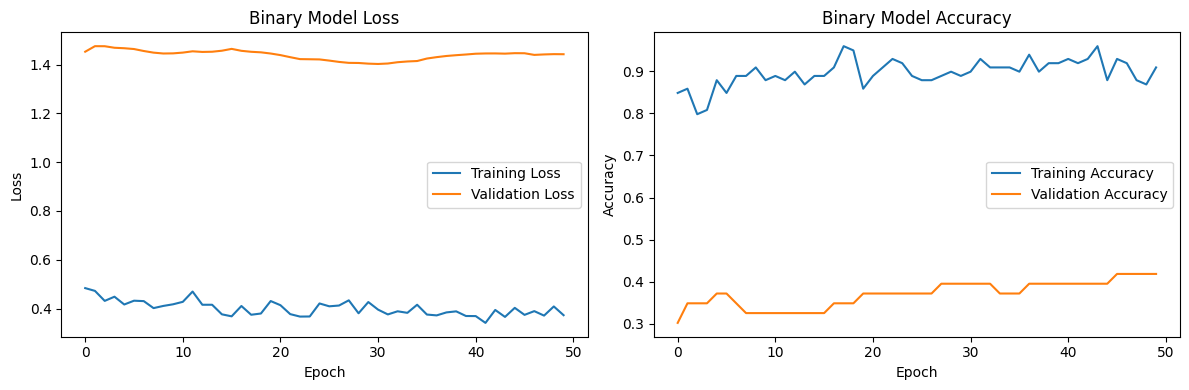

In [64]:
import matplotlib.pyplot as plt

# Plot binary model training history
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history_binary.history['loss'], label='Training Loss')
plt.plot(history_binary.history['val_loss'], label='Validation Loss')
plt.title('Binary Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history_binary.history['accuracy'], label='Training Accuracy')
plt.plot(history_binary.history['val_accuracy'], label='Validation Accuracy')
plt.title('Binary Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

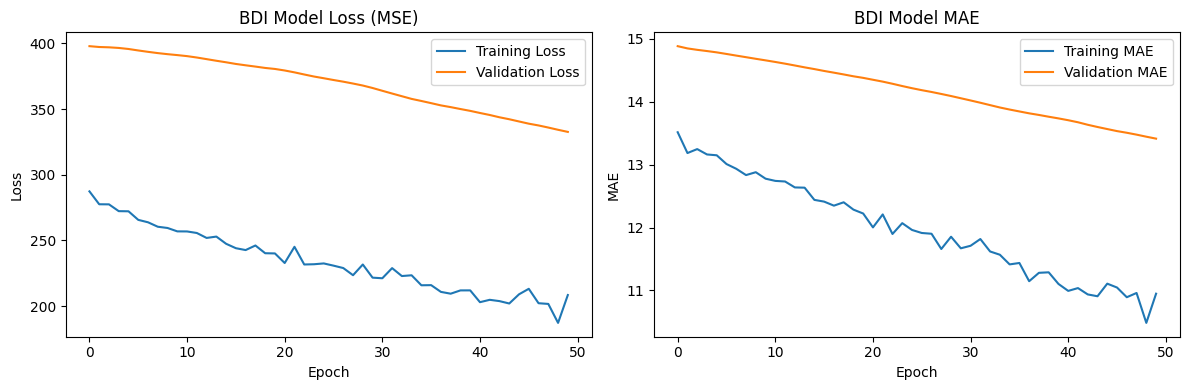

In [66]:
# Plot BDI model training history
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history_BDI.history['loss'], label='Training Loss')
plt.plot(history_BDI.history['val_loss'], label='Validation Loss')
plt.title('BDI Model Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history_BDI.history['mae'], label='Training MAE')
plt.plot(history_BDI.history['val_mae'], label='Validation MAE')
plt.title('BDI Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

## Make Predictions 

In [67]:
# Make predictions on validation set
predictions = model_BDI.predict(X_val_reg)
print(f"Predictions shape: {predictions.shape}")
print(f"First 5 predictions: {predictions[:5].flatten()}")

predictions_binary = model_binary.predict(X_val_binary)
print(f"Predictions shape: {predictions_binary.shape}")
print(f"First 5 predictions: {predictions_binary[:5].flatten()}")

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/stepWARNING:tensorflow:6 out of the last 8 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x3149f49a0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step 
Predictions shape: (42, 1)
First 5 predictions: [ 1.1354892   0.60683393  5.022821    7.726847   -2.1880085 ]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predictions shape: (43, 1)
First 5 predictions: [0.76725

In [68]:
model_binary.predict(X_val_binary)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[7.6725984e-01],
       [6.7381597e-01],
       [9.9860793e-01],
       [6.2268353e-01],
       [6.1821997e-01],
       [7.4442077e-01],
       [3.6221972e-01],
       [5.5023760e-01],
       [5.9427375e-01],
       [4.9160528e-01],
       [9.9988359e-01],
       [6.5782398e-01],
       [5.9364653e-01],
       [1.6225624e-01],
       [9.5592283e-02],
       [3.0875084e-01],
       [4.4449562e-01],
       [5.9573406e-01],
       [2.1668555e-01],
       [3.0933183e-01],
       [4.9160528e-01],
       [4.9651998e-01],
       [9.9954093e-01],
       [7.0095998e-01],
       [8.9487094e-01],
       [8.7654668e-01],
       [9.8637573e-04],
       [7.3153907e-01],
       [9.2073992e-02],
       [5.5847621e-01],
       [4.9160528e-01],
       [9.0161783e-01],
       [7.9035830e-01],
       [4.1696024e-01],
       [5.8888630e-03],
       [1.9897906e-01],
       [6.1473292e-01],
       [3.0339080e-01],
       [4.3523604e-01],
       [9.5873266e-01],
       [5.6235176e-01],
       [9.999883

In [69]:
#dataframe with the predictions and true values for BDI regression
bdi_results = pd.DataFrame({
    'True_BDI': y_val_regression,
    'Predicted_BDI': predictions.flatten()
})

#display the results
bdi_results


,True_BDI,Predicted_BDI
0,2.0,1.135489
1,5.0,0.606834
2,34.0,5.022821
3,12.0,7.726847
4,9.0,-2.188009
5,1.0,2.335203
6,8.0,2.951844
7,19.0,0.463214
8,4.0,-1.372085
9,34.0,-0.851740


/var/folders/34/cl2w6pzj68b1kddz5gbtdbmh0000gp/T/ipykernel_35010/2425006796.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


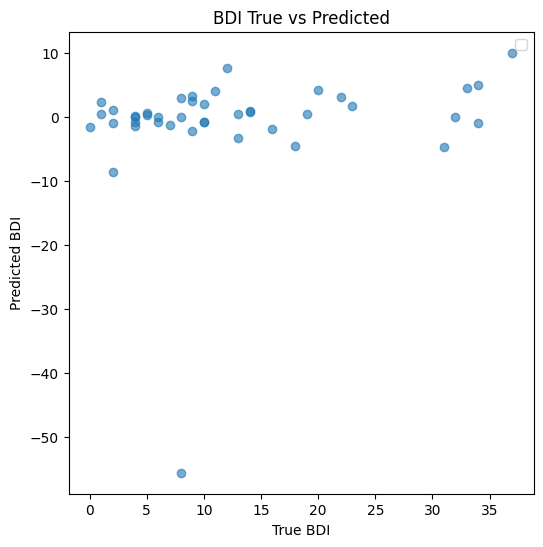

In [71]:
#plot BDI true vs predicted
plt.figure(figsize=(6, 6))
plt.scatter(bdi_results['True_BDI'], bdi_results['Predicted_BDI'],
            alpha=0.6)

plt.title('BDI True vs Predicted')
plt.xlabel('True BDI')
plt.ylabel('Predicted BDI')
plt.legend()
plt.show()

In [72]:
#binary results dataframe
binary_results = pd.DataFrame({
    'True_Depression': y_val_binary,
    'Predicted_Probability': predictions_binary.flatten()
})
binary_results

,True_Depression,Predicted_Probability
0,False,0.767260
1,False,0.673816
2,True,0.998608
3,False,0.622684
4,False,0.618220
5,False,0.744421
6,False,0.362220
7,True,0.550238
8,False,0.594274
9,True,0.491605


In [73]:
#display binary results where the true label is "true"

binary_results[binary_results['True_Depression'] == 1]



,True_Depression,Predicted_Probability
2,True,0.998608
7,True,0.550238
9,True,0.491605
10,True,0.999884
15,True,0.308751
17,True,0.595734
19,True,0.309332
21,True,0.496520
23,True,0.700960
28,True,0.092074


In [74]:
#display binary results where the true label is "false"
binary_results[binary_results['True_Depression'] == 0]

,True_Depression,Predicted_Probability
0,False,0.767260
1,False,0.673816
3,False,0.622684
4,False,0.618220
5,False,0.744421
6,False,0.362220
8,False,0.594274
11,False,0.657824
12,False,0.593647
13,False,0.162256


In [75]:
#compare the percent predicted true for the true labels and the false labels
true_depression_rate = binary_results[binary_results['True_Depression'] == 1]['Predicted_Probability'].mean()
false_depression_rate = binary_results[binary_results['True_Depression'] == 0]['Predicted_Probability'].mean()

print(f"Average predicted probability for true depression cases: {true_depression_rate:.4f}")
print(f"Average predicted probability for false depression cases: {false_depression_rate:.4f}")

Average predicted probability for true depression cases: 0.5614
Average predicted probability for false depression cases: 0.5680


In [76]:
#number of predictions above 0.5 for true and false labels
num_true_above_threshold = binary_results[(binary_results['True_Depression'] == 1) & (binary_results['Predicted_Probability'] >= 0.5)].shape[0]
num_false_above_threshold = binary_results[(binary_results['True_Depression'] == 0) & (binary_results['Predicted_Probability'] >= 0.5)].shape[0]
print(f"Number of true depression cases predicted above threshold: {num_true_above_threshold}")
print(f"Number of false depression cases predicted above threshold: {num_false_above_threshold}")

Number of true depression cases predicted above threshold: 7
Number of false depression cases predicted above threshold: 18
